## Predicting Building Cooling Load and Classifying Wine Regions 

### Problem 1

#### Goal: create model that has optimal input variables and parameters to predict the cooling load of buildings based on their architectural features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor as treeReg
from sklearn.metrics import mean_squared_error as mse, r2_score

In [154]:
data = pd.read_excel('ENB2012_data.xlsx')
df = pd.DataFrame(data)
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [155]:
# Renaming Columns
df.rename(columns = {'X1': 'Relative Compactness','X2':'Surface Area','X3':'Wall Area','X4':'Roof Area','X5':'Overall Height','X6':'Orientation','X7':'Glazing Area','X8':'Glazing Area Distribution','Y1':'Heating Load','Y2':'Cooling Load'}, inplace = True)

# Calculating total area
df['Total Area'] = df['Surface Area'] + df['Wall Area'] + df['Roof Area']

In [180]:
# Modeling all variables
X = df[['Total Area','Orientation','Overall Height','Glazing Area','Glazing Area Distribution']]
y = df['Cooling Load']

In [5]:
'''
I noticed that most columns were duplicated, but differing orientations. 
I decide to group by the feature to observe its impact on cooling load. It seems that orientation 
5 has a slightly higher impact than the other. 
'''
df.groupby('Orientation').mean()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Total Area
Orientation,,,,,,,,,,
2,0.764167,671.708333,318.5,176.604167,5.25,0.234375,2.8125,22.312865,24.604531,1166.8125
3,0.764167,671.708333,318.5,176.604167,5.25,0.234375,2.8125,22.380677,24.312552,1166.8125
4,0.764167,671.708333,318.5,176.604167,5.25,0.234375,2.8125,22.259875,24.480313,1166.8125
5,0.764167,671.708333,318.5,176.604167,5.25,0.234375,2.8125,22.275365,24.953646,1166.8125


In [182]:
X_train, X_test, y_train, y_test = train_test_split(df[[i]],y, test_size = 0.3, random_state = 2)

In [187]:
model1 = treeReg(random_state = 5)
model1.fit(X_train, y_train)

print(f'r2 score: {r2_score(y_test, model1.predict(X_test))}')
print(f'rmse: {np.sqrt(mse(y_test, model1.predict(X_test)))}')

r2 score: 0.7351987944747302
rmse: 4.8925282074053005


In [158]:
df.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load',
       'Total Area'],
      dtype='object')

In [162]:
# Checking significance of each column individually
# I noticed that the Total Area has a less significant impact on the model than inputting the areas individually
for i in df.columns:
    X_train, X_test, y_train, y_test = train_test_split(df[[i]],y, test_size = 0.3, random_state = 2)
    
    model1 = treeReg(random_state = 5)
    model1.fit(X_train, y_train)
    
    r2 = r2_score(y_test, model1.predict(X_test))
    rmse = np.sqrt(mse(y_test, model1.predict(X_test)))
    
    print({'column':i,'r2':r2,'rmse':rmse})

{'column': 'Relative Compactness', 'r2': 0.9156161247930632, 'rmse': np.float64(2.761869106539868)}
{'column': 'Surface Area', 'r2': 0.9156161247930632, 'rmse': np.float64(2.7618691065398675)}
{'column': 'Wall Area', 'r2': 0.41968017496865184, 'rmse': np.float64(7.24280950574898)}
{'column': 'Roof Area', 'r2': 0.8094541333216206, 'rmse': np.float64(4.150239175220016)}
{'column': 'Overall Height', 'r2': 0.7928976074337506, 'rmse': np.float64(4.326790996534339)}
{'column': 'Orientation', 'r2': -0.012266241902380015, 'rmse': np.float64(9.565787658167293)}
{'column': 'Glazing Area', 'r2': 0.014904465919256982, 'rmse': np.float64(9.43653455072209)}
{'column': 'Glazing Area Distribution', 'r2': -0.027203554733503887, 'rmse': np.float64(9.636107050811772)}
{'column': 'Heating Load', 'r2': 0.9425926107634, 'rmse': np.float64(2.278018556793117)}
{'column': 'Cooling Load', 'r2': 0.9999333903412496, 'rmse': np.float64(0.07759646977287099)}
{'column': 'Total Area', 'r2': 0.7351987944747302, 'rmse'

In [176]:
# Running various combinations of features, these gave me the best outcome
X = df[['Relative Compactness','Surface Area','Roof Area','Overall Height']]

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 2)

model = treeReg(random_state = 5)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=5)

In [178]:
r2_score(y_test, model.predict(X_test))

0.9156161247930632

In [179]:
np.sqrt(mse(y_test, model.predict(X_test)))

np.float64(2.7618691065398675)

### Problem 2

#### Goal: Train and compare two classifier models that can classify wine regions based on their features

In [10]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.ensemble import RandomForestClassifier as RFC

In [190]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
features = wine.data.features 
targets = wine.data.targets 

In [191]:
features.columns

Index(['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline'],
      dtype='object')

In [192]:
targets.columns

Index(['class'], dtype='object')

In [193]:
# Merge data together 
mergedData = pd.merge(targets, features, left_index=True, right_index=True)
mergedData

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [194]:
# All variables considered
X = mergedData[['Alcohol','Malicacid','Ash','Alcalinity_of_ash','Magnesium',
               'Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins',
               'Color_intensity','Hue','0D280_0D315_of_diluted_wines','Proline']]
y = mergedData['class']

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [196]:
# The first algorithm I will be using is KNearestNeighbors
# The best k value is usually the square root of the length of the data
np.sqrt(len(X))

np.float64(13.341664064126334)

In [197]:
accuracy = []

In [198]:
# In order to find the best value for K, I decide to loop through a range of values (1 to the sqrt(length of data)) and utilize the best score in my actual model
for i in range(1,13):
    model = KNN(i)
    model.fit(X_train, y_train)
    accuracy.append({'k':i,'score':accuracy_score(y_test,model.predict(X_test))})

In [199]:
df2 = pd.DataFrame(accuracy)
df2

,k,score
0,1,0.740741
1,2,0.666667
2,3,0.740741
3,4,0.666667
4,5,0.703704
5,6,0.592593
6,7,0.648148
7,8,0.666667
8,9,0.685185
9,10,0.666667


In [200]:
df2.loc[df2['score']==df2['score'].max()]

,k,score
0,1,0.740741
2,3,0.740741


In [201]:
# To better understand which features could provide the best outcome, I loop through each feature individually and model
for i in X.columns:
    X_train, X_test, y_train, y_test = train_test_split(X[[i]],y, test_size = 0.3, random_state = 1)
    
    model = KNN(1)
    model.fit(X_train, y_train)
    
    score = model.score(X_test, y_test)
    
    print({'column':i,'score':score})

{'column': 'Alcohol', 'score': 0.5555555555555556}
{'column': 'Malicacid', 'score': 0.5555555555555556}
{'column': 'Ash', 'score': 0.42592592592592593}
{'column': 'Alcalinity_of_ash', 'score': 0.48148148148148145}
{'column': 'Magnesium', 'score': 0.48148148148148145}
{'column': 'Total_phenols', 'score': 0.6111111111111112}
{'column': 'Flavanoids', 'score': 0.6666666666666666}
{'column': 'Nonflavanoid_phenols', 'score': 0.4074074074074074}
{'column': 'Proanthocyanins', 'score': 0.5740740740740741}
{'column': 'Color_intensity', 'score': 0.7407407407407407}
{'column': 'Hue', 'score': 0.5370370370370371}
{'column': '0D280_0D315_of_diluted_wines', 'score': 0.5925925925925926}
{'column': 'Proline', 'score': 0.7037037037037037}


In [202]:
# Playing around with different combinations of features, these provided the best score
X = mergedData[['Color_intensity','Flavanoids','Alcohol']]

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

model = KNN(74)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9074074074074074

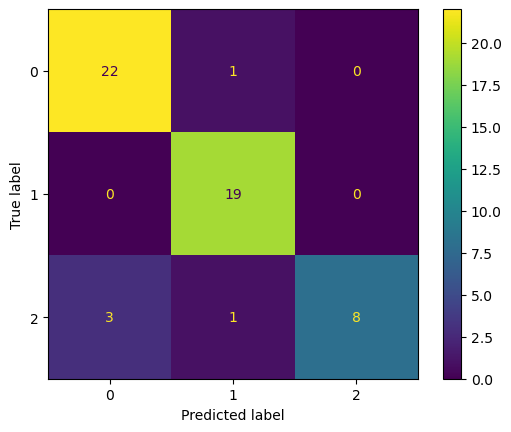

In [204]:
# Utilize a confusion matrix to see our predictions
mtx = confusion_matrix(y_test, model.predict(X_test))
ConfusionMatrixDisplay(mtx).plot()

In [205]:
# For the second model I decided to use the RandomForestClassifier utilizing a different random state value)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 50)

In [206]:
model2 = RFC(74)
model2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=74)

In [207]:
# In comparison, this model scores less than the k nearest neighbors
accuracy_score(y_test,model.predict(X_test))

0.8518518518518519